# Project Part 2

## Jack Provance

To continue this investigation, I collected 18,000 more connections to enrich the data. In addition to the Wall Street Journal, I used the Financial Times, Bloomberg, the New York Times, and Buzz Feed as central nodes for collection. I am interested in studying the connections between news organizations.

The following block loads all the connections and builds an intial graph.

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

all_connections = pd.read_csv('AllConnections.csv', usecols=[1,2])

all_connections.columns = ['User', 'Following']
all_users = np.hstack([all_connections['User'].unique(), all_connections[~all_connections['Following'].isin(all_connections['User'].unique())]['Following'].unique()])

G = nx.DiGraph()

G.add_nodes_from(all_users)
G.add_edges_from(list(all_connections.to_records(index=False)))

This block calculates the shortest distance between the central nodes of interest. BuzzFeed was not connected to the other central nodes and does not appear in the table. Of the nodes of interest, the Wall Street Journal has the shortest paths to the other news sources.

In [2]:
paths = pd.DataFrame(columns=['Source', 'Target', 'Distance'])

for source in ['WSJ', 'nytimes', 'FT', 'business', 'buzzfeed']:
    for target in ['WSJ', 'nytimes', 'FT', 'business', 'buzzfeed']:
        if source != target:
            try:
                paths = paths.append({'Source': source, 'Target': target, 'Distance': len(nx.shortest_path(G, source=source, target=target))}, ignore_index=True)
            except:
                pass

paths.sort_values(by='Distance')

Source   Target Distance
1       WSJ       FT        3
2   nytimes      WSJ        3
3   nytimes       FT        3
4        FT      WSJ        3
5        FT  nytimes        3
6  business      WSJ        3
0       WSJ  nytimes        4
8  business       FT        5
7  business  nytimes        6

The following sections create tables for degree, eigenvector, and betweeness centrality. An interesting business use case here would be for news organizations to identify and quantify the outreach of employees and future hires. As news organizations seek niche audiences that are willing to pay for relevant content, identifying the journalists that can reach these groups is necessary. Betweeness scores are great ways to evaluate the individuals that reach audiences of interest.

In [3]:
deg = pd.DataFrame(G.degree())
deg.columns = ['node', 'degree']

deg.sort_values(by='degree', ascending=False).iloc[:20,:]

node  degree
26      louisestory     310
23  dory_carrharris     309
39     elizashapiro     308
25        EbonyReed     307
74         business     307
75      AkshatRathi     306
45     JesseDrucker     304
54               FT     304
24        rajivpant     304
35          nytimes     304
47    thunderwooddd     304
80      lucy_meakin     303
85     JamesPaton14     303
42       AliWatkins     303
31         ckrewson     303
44   BySheilaKaplan     303
41         tejalrao     302
38        scottdodd     302
43        Lindzcook     302
67  tatianatenreyro     302

In [4]:
eig = pd.DataFrame.from_dict(nx.eigenvector_centrality(G), orient='index').reset_index()
eig.columns = ['node', 'Eigenvector']
eig.sort_values(by='Eigenvector', ascending=False).iloc[:20,:]

node  Eigenvector
112     CorySchouten     0.125788
256       bourreelam     0.123507
26       louisestory     0.119860
19         a_zeisler     0.118702
2             lyazel     0.118139
95       beckybowers     0.117095
4       KevinDubouis     0.116218
1     JasonJedlinski     0.113860
5            Anthony     0.108679
28       srussolillo     0.105132
3         kkjschmidt     0.103809
8           cli6cli6     0.103567
9         RobinKwong     0.103104
25         EbonyReed     0.098822
23   dory_carrharris     0.097266
174       tknakagawa     0.084350
381       AlexLJanin     0.083372
819       jjmccorvey     0.081587
619     nico_gendron     0.078815
375    DeborahAcosta     0.078177

In [5]:
bet = pd.DataFrame.from_dict(nx.betweenness_centrality(G), orient='index').reset_index()
bet.columns = ['node', 'Betweeness']
bet.sort_values(by='Betweeness', ascending=False).iloc[:20,:]

node  Betweeness
1    JasonJedlinski    0.001060
0               WSJ    0.000787
35          nytimes    0.000674
23  dory_carrharris    0.000638
54               FT    0.000584
63         BuzzFeed    0.000544
67  tatianatenreyro    0.000488
26      louisestory    0.000469
4      KevinDubouis    0.000456
74         business    0.000433
11           LEEBEY    0.000429
84      ericpfanner    0.000393
39     elizashapiro    0.000284
36          skurutz    0.000284
47    thunderwooddd    0.000248
28      srussolillo    0.000196
25        EbonyReed    0.000188
59        sdbernard    0.000182
75      AkshatRathi    0.000154
48       EmmaBubola    0.000120

The user 'JasonJedlinski' is a good example of the value of betweeness scores. This user has a very low degree score, the most obvious measure, but this user has value because of the groups of people that connect through this person. Identifying these people is important to institutions that are interested in reaching audiences.

In [7]:
deg[deg['node']=='JasonJedlinski']

node  degree
1  JasonJedlinski     111

The following graph removes nodes with only a few connections to show the general structure of the network. An interesting next step to enhance this graph would be to add attributes to the nodes and edges. These attributes could be different data from Twitter.

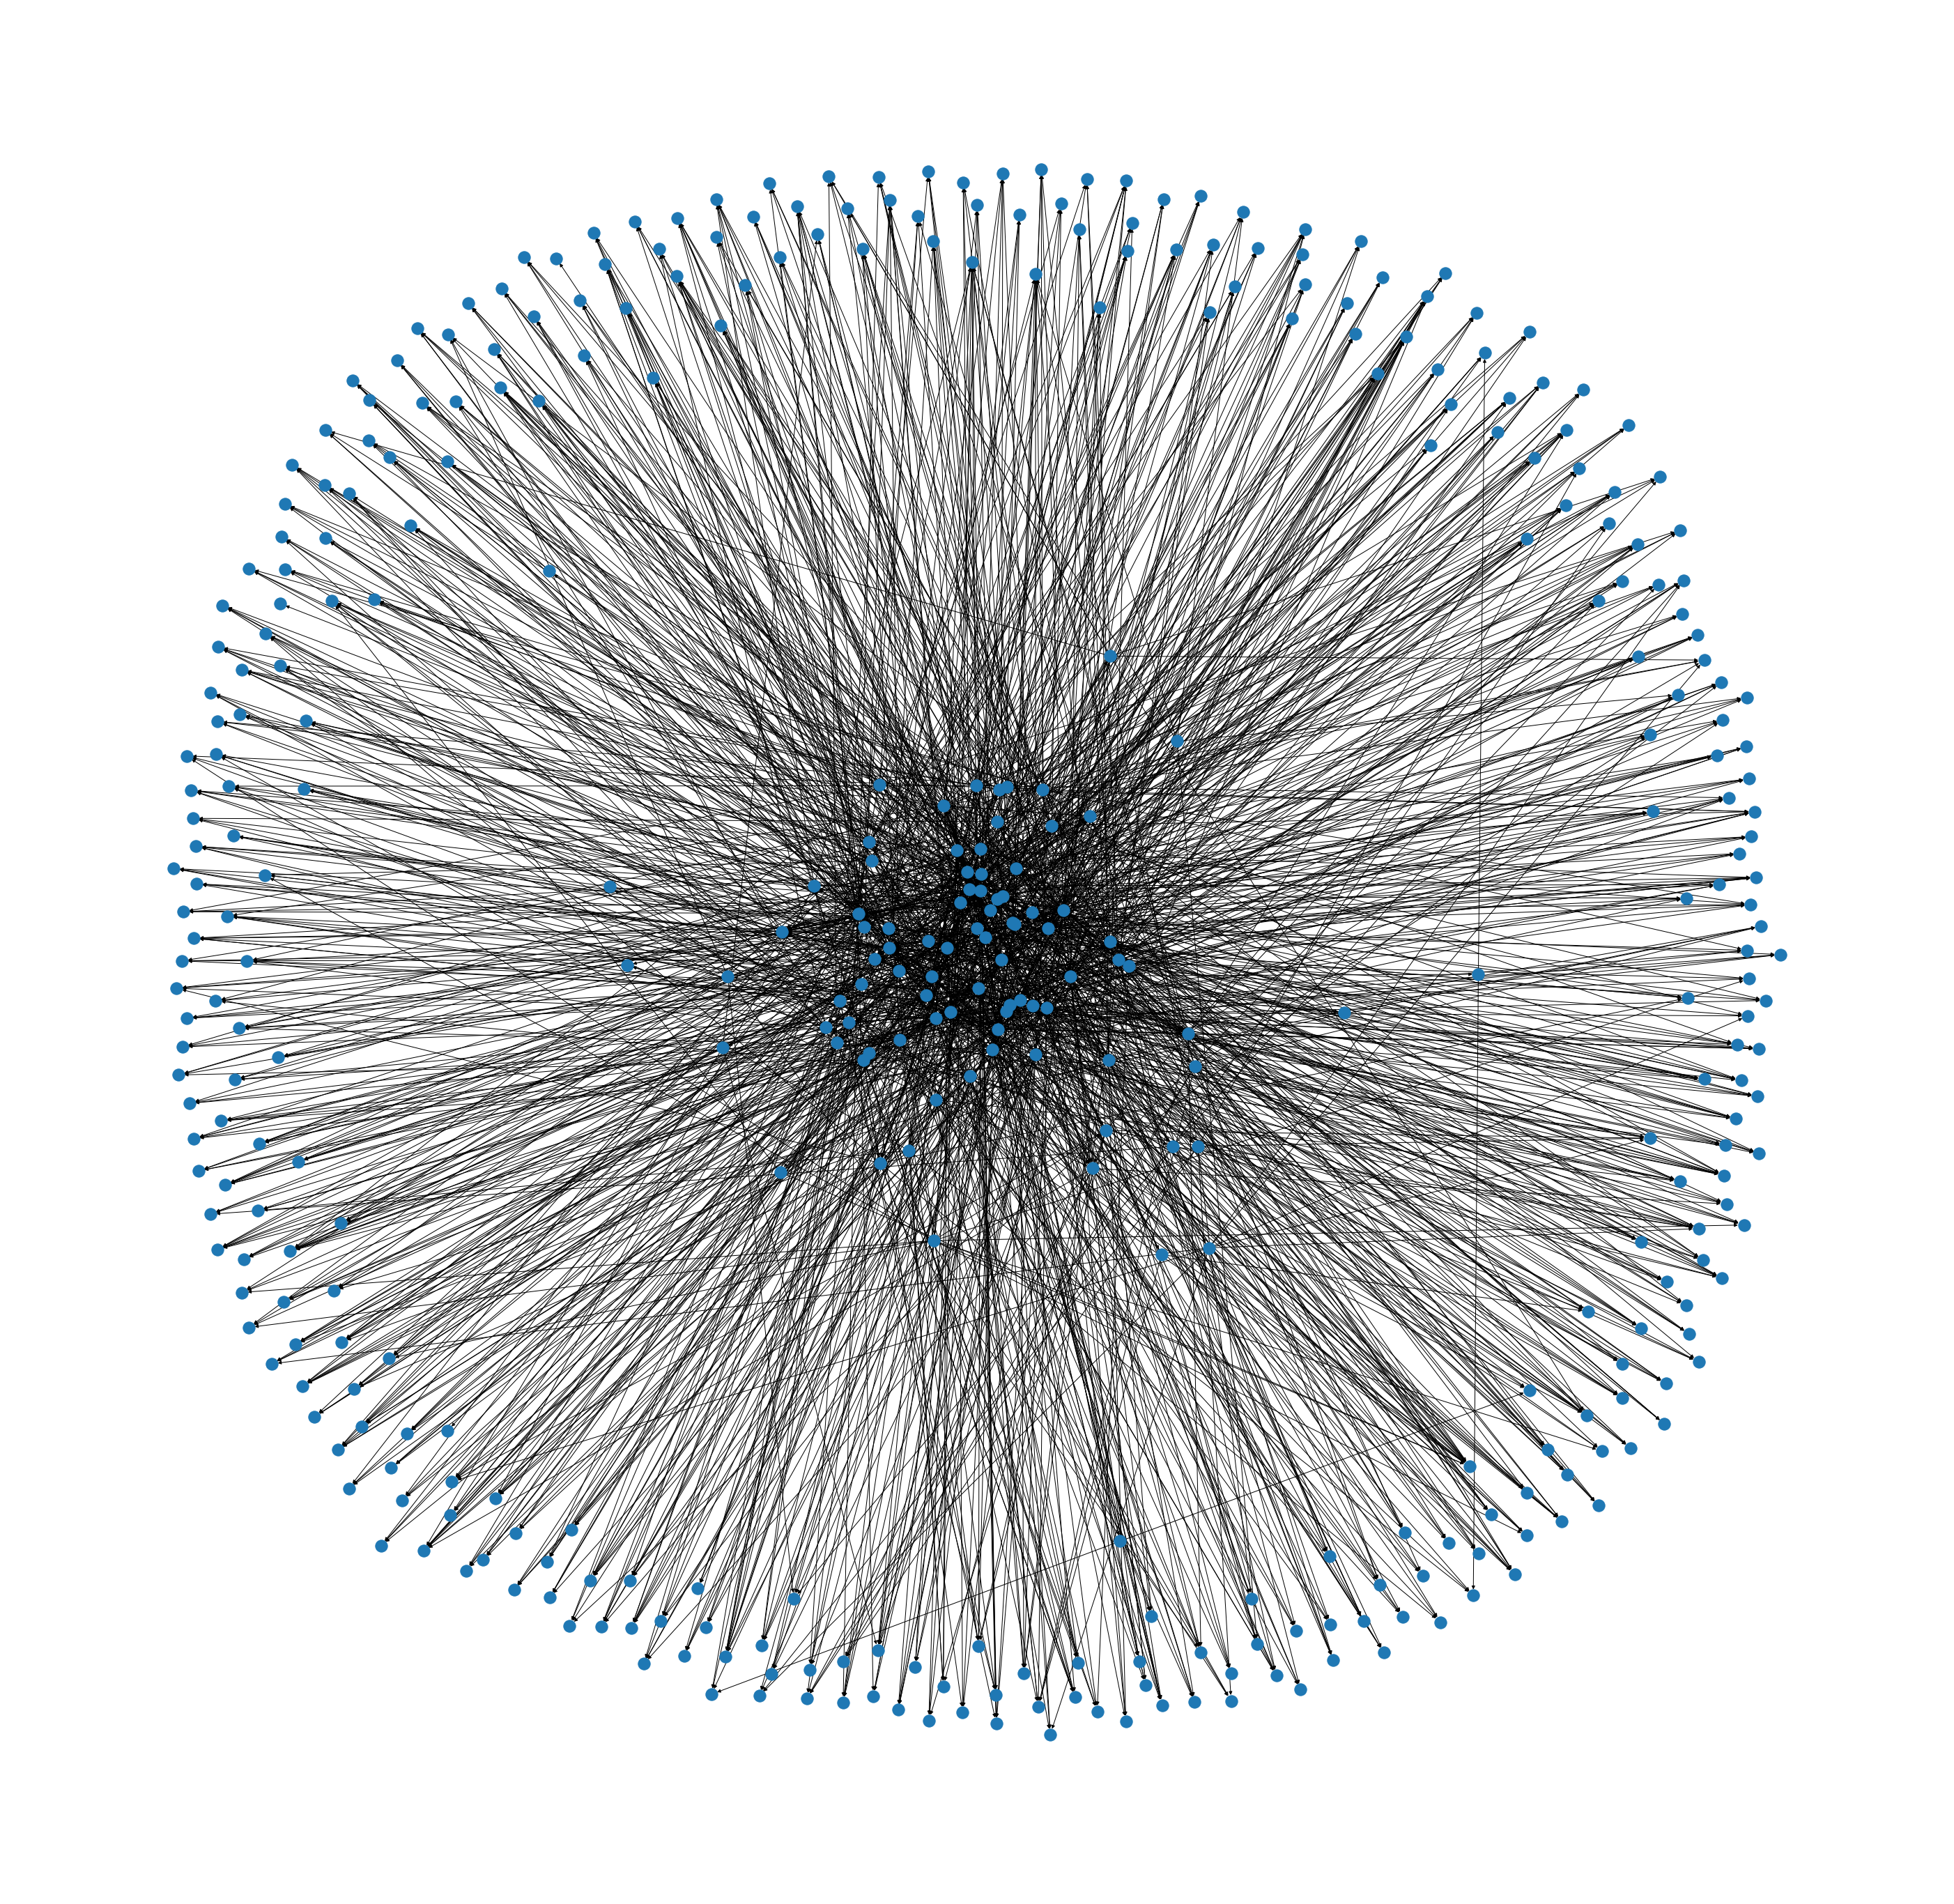

In [6]:
G.remove_nodes_from(deg[deg['degree'] < 4]['node'])
fig, ax = plt.subplots(figsize=[50, 50])

nx.draw_spring(G, ax=ax)